In [1]:
import sys
sys.path.append('./../')

import ikamoana.ikaseapodym as ikadym

from ikamoana.utils.feedinghabitatutils import seapodymFieldConstructor
from ikamoana.ikafish.ikafish import IkaMix

In [2]:
configuration_filepath = "./../data/ikamoana_config/IkaSim_Example_Mix.xml"
my_sim = ikadym.IkaSeapodym(filepath=configuration_filepath)

In [3]:
my_sim.ika_params

{'start_distribution': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/',
 'seapodym_file': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/SEAPODYM_data/run-test/newparfile.xml',
 'forcing_dir': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/',
 'start_time': numpy.datetime64('2000-01-15'),
 'duration_time': 7776000,
 'delta_time': 172800,
 'output_delta_time': 2592000,
 'spatial_limits': {'lonlim': (120.0, 290.0), 'latlim': (-40.0, 50.0)},
 'files_only': False,
 'forcing_files': {'test': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/skj_age5.dym',
  'test_2': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/skj_age5.nc'},
 'fields_interp_method': 'nearest',
 'start_length': 26.43,
 'ageing_cohort': True,
 'number_of_cohorts': 1000,
 'start_dynamic_file': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/skj_age',
 'start_dynamic_file_extension': 'dym

In [4]:
## Using Inna's feeding habitat : ########
# fh = xr.load_dataarray("./../../data/Inna/Modified_skj_cohort_habitat_20080115-20080515_20080115.nc")
# my_sim.loadFields(from_habitat=fh)

## Using ikafield class : ################
my_sim.loadFields()

 It will also add +1 to sigma_min. Cf. function documentation for more details.


In [5]:
# my_sim.initializeParticleSet(particles_class=IkaFish, method="start_static_file")
my_sim.initializeParticleSet(particles_class=IkaMix,
                             particles_number=1000,
                             method="start_static_file")

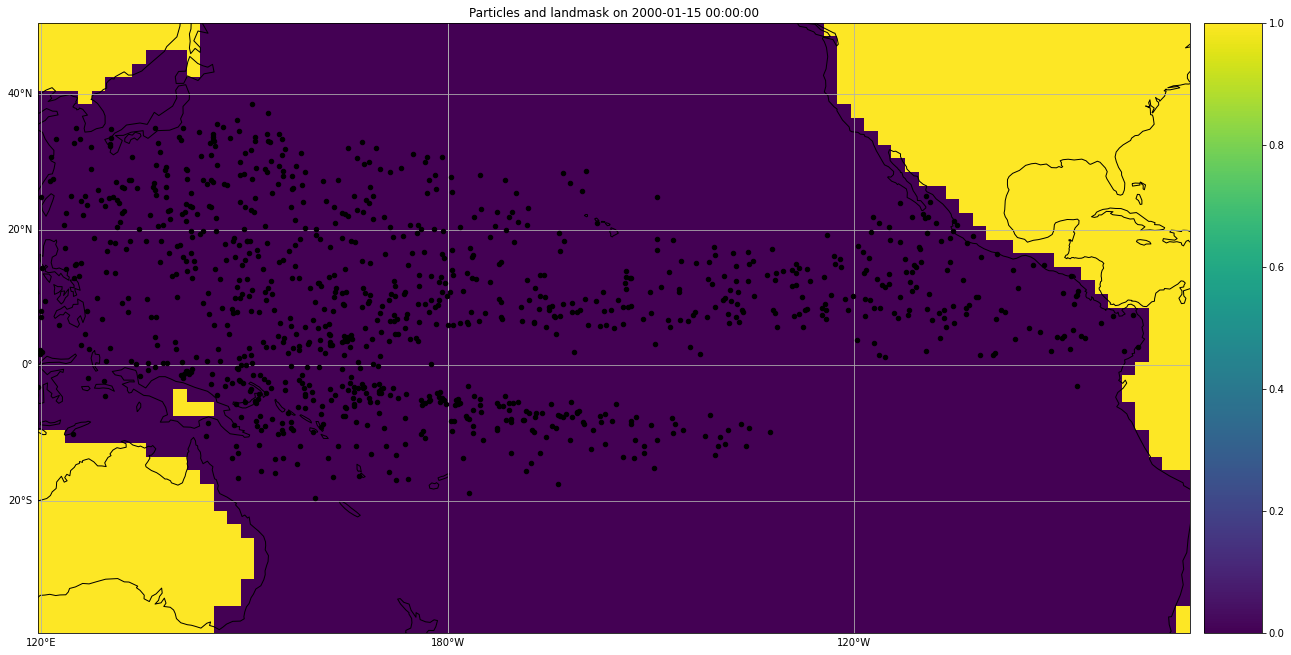

In [6]:
my_sim.fish.show(field=my_sim.ocean.landmask)

In [7]:
print("Nb fish = ",len(my_sim.fish))

Nb fish =  1000


In [8]:
my_sim.runKernels()

INFO: Compiled ArrayIkaMixCalcLonLatScalersIkAdvectionRK4TaxisRK4RandomWalkNonUniformDiffusionIkaDimMoveWithDiffusionRerollFishingMortalityNaturalMortalityUpdateSurvivalProbUpdateMixingPeriodAge ==> /tmp/parcels-1000/lib5d7d59b0ea4bdab894ae11e407c546a7_0.so


In [9]:
print("Nb fish = ",len(my_sim.fish))

Nb fish =  991


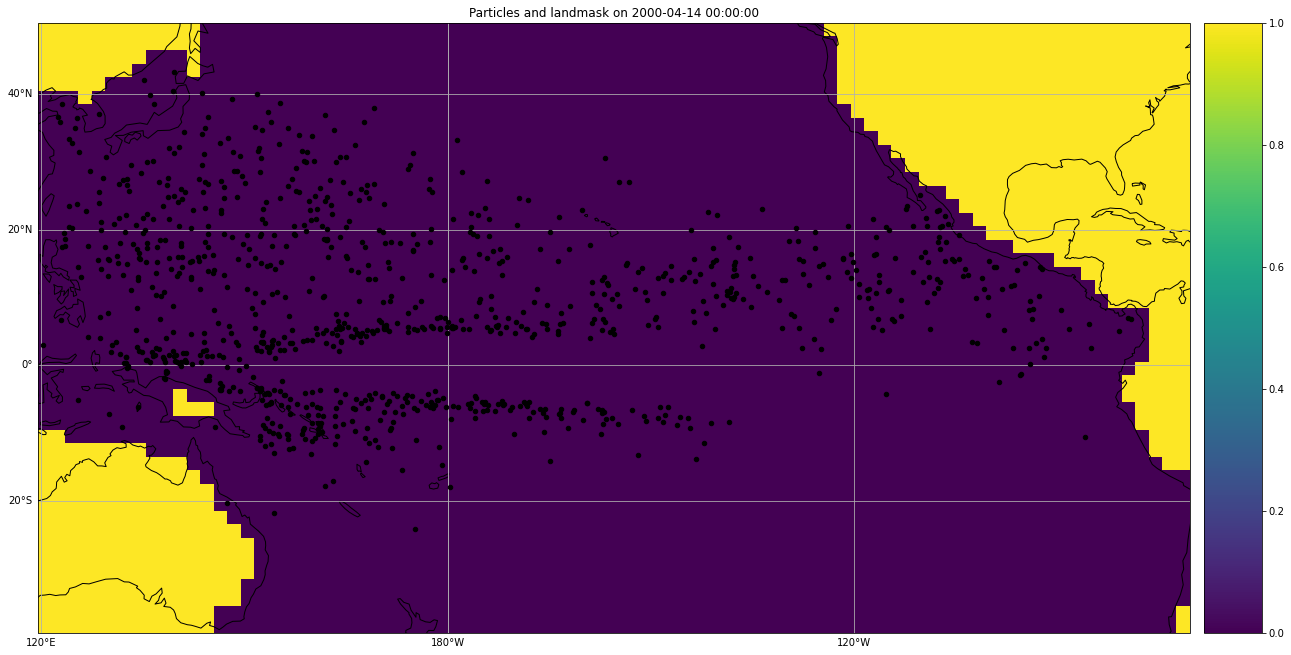

In [10]:
my_sim.fish.show(field=my_sim.ocean.landmask, with_particles=True, alpha=0.1)

In [11]:
my_sim.fish[0]

P[0](lon=153.329468, lat=2.662938, depth=0.000000, age_class=6.000000, region=0.000000, CapProb=0.000000, SurvProb=0.000108, TAL=7776000.000000, Mix3CapProb=0.000000, Mix6CapProb=0.000000, Mix9CapProb=0.000000, Mix3SurvProb=1.000000, Mix6SurvProb=1.000000, Mix9SurvProb=1.000000, time=7776000.000000)

---

In [13]:
my_sim.oceanToNetCDF(to_dataset=True)

Directory ./IkaSim_Example already exist.
U
V
H
Kx
Ky
dKx_dx
dKy_dy
Tx
Ty
F
test
test_2
landmask


In [14]:
import xarray as xr
xr.load_dataset("./IkaSim_Example/IkaSim_Example.nc")

<xarray.Dataset>
Dimensions:   (time: 35, lat: 60, lon: 101)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2010-07-17
  * lat       (lat) float64 -53.5 -51.5 -49.5 -47.5 ... 58.5 60.5 62.5 64.5
  * lon       (lon) float64 89.5 91.5 93.5 95.5 97.5 ... 283.5 285.5 287.5 289.5
Data variables: (12/13)
    U         (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    V         (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    H         (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    Kx        (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    Ky        (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    dKx_dx    (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    ...        ...
    Tx        (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    Ty        (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    F         (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    test      (time, lat, lon) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
    test_2    (time, lat, lon) float32 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
    landmask  (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan